Here we will import libraries as required

In [1]:
import pandas as pd

# **Load the data

In [3]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

In [4]:
data= pd.read_csv(url)

In [5]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**This is Labelled data that is Supervised

# Import Libraries for EDA

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df= data[['Hours','Scores']]

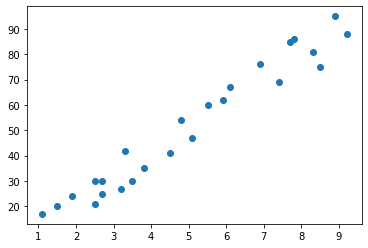

In [8]:
plt.scatter(data['Hours'],data['Scores'])

<AxesSubplot:>

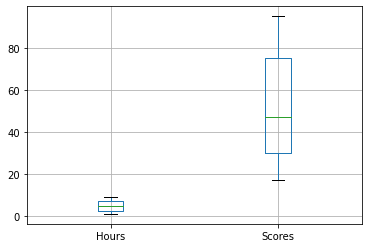

In [9]:
df.boxplot()

<AxesSubplot:>

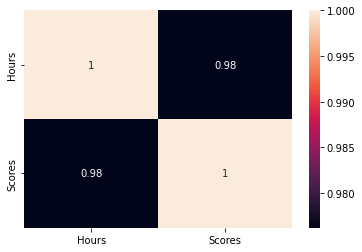

In [10]:
sns.heatmap(df.corr(), annot=True)

**Here variables are highly correlated to each other

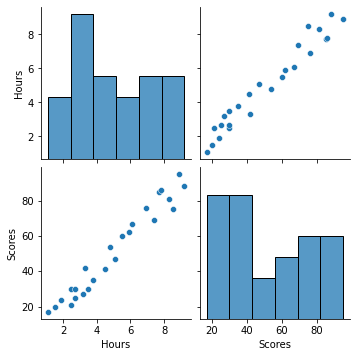

In [11]:
sns.pairplot(data[['Hours','Scores']])

# Lets split the data into Test and Train

In [12]:
X = data['Hours'].values.reshape(-1, 1)
Y = data['Scores'].values.reshape(-1, 1)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2)

In [15]:
x_train

array([[7.8],
       [2.7],
       [7.7],
       [3.3],
       [8.3],
       [1.1],
       [3.2],
       [3.8],
       [2.7],
       [7.4],
       [1.5],
       [9.2],
       [4.5],
       [8.9],
       [5.9],
       [2.5],
       [8.5],
       [1.9],
       [3.5],
       [4.8]])

# Build the Model

In [16]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [17]:
LR.fit(x_train, y_train)

LinearRegression()

In [18]:
print(LR.intercept_)

[3.4736426]


In [19]:
print(LR.coef_)

[[9.54160431]]


# Create the formula to predict Score by Hours of study per day

In [20]:
def calc(slope, intercept, hours):
    return slope*hours+intercept

score = calc(LR.coef_, LR.intercept_, x_train)
print(score)

[[77.89815625]
 [29.23597425]
 [76.94399582]
 [34.96093684]
 [82.66895841]
 [13.96940735]
 [34.00677641]
 [39.731739  ]
 [29.23597425]
 [74.08151453]
 [17.78604907]
 [91.25640229]
 [46.41086202]
 [88.393921  ]
 [59.76910806]
 [27.32765339]
 [84.57727927]
 [21.6026908 ]
 [36.8692577 ]
 [49.27334331]]


Text(0, 0.5, 'Scores')

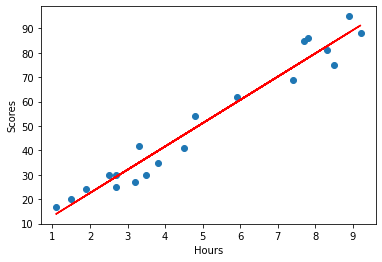

In [21]:
plt.scatter(x_train, y_train)
plt.plot(x_train,score, color = 'red')
plt.xlabel('Hours')
plt.ylabel('Scores')

In [22]:
y_pred = LR.predict(x_test)

In [23]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

   Actual  Predicted
0      67  61.677429
1      60  55.952466
2      76  69.310712
3      21  27.327653
4      47  52.135825


Text(0, 0.5, 'Scores')

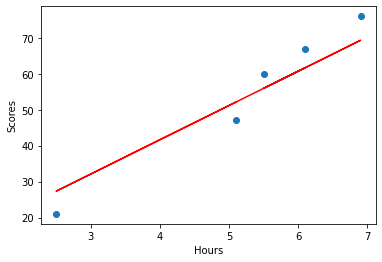

In [24]:
plt.scatter(x_test, y_test)
plt.plot(x_test,y_pred, color = 'red')
plt.xlabel('Hours')
plt.ylabel('Scores')

# Lets find the Score if studies for 9.25 Hours per day

In [25]:
score = LR.predict([[9.25]])
print(score)

[[91.73348251]]


**So if studied for 9.25 Hours Scoring Percentage will be 91%